Part 2: Optimization Functions

In [2]:
## Machine Learning - Exercise 2: Linear Regression

#  Instructions
#  ------------
# 
#  This file contains code that helps you get started on optimization functions
#
#   
#     PART#02
#         OPTIMIZATION FUNCTIONS
#         LEARNING RATE
#
#
#  For this exercise, you will not need to change any code in this file,
#  or any other files other than those mentioned above.
#
# X refers to the population size in 10,000s
# Y refers to the profit in $10,000s
	

#Write the code below every comment
import numpy as np
from google.colab import drive, files
drive.mount('/content/drive/')
path = "/content/drive/MyDrive/Assignment Linear Regression/ex2data1.txt"

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


Optimization Functions

Optimization terminated successfully.
         Current function value: 4.476971
         Iterations: 42
         Function evaluations: 202
         Gradient evaluations: 201
Optimization terminated successfully.
         Current function value: 4.476971
         Iterations: 90
         Function evaluations: 172


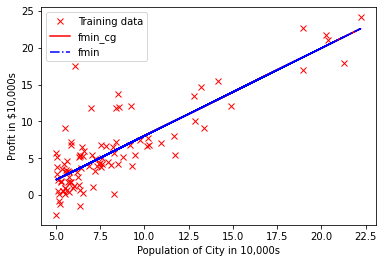

In [3]:
import matplotlib.pyplot as plt

# used for manipulating directory paths
import os

from pylab import *
from numpy import *
from numpy.random import normal
from scipy.optimize import fmin_cg

# Read comma separated data
data = np.loadtxt(os.path.join('Data', path ), delimiter=',')
X, Y = data[:, 0], data[:, 1]


args = (X,Y)  # parameter values
m=len(X)
al=1
lr2=[]



#--------  COST FUNCTION-------------
def J(t,x,y):
  theta=t
  ########### YOUR COST FUNCTION CODE HERE ###########
  x = np.stack([np.ones(m), x], axis=1)
  h = np.dot(x, theta)
  temp=np.square(h-Y)
  temp2 =np.sum(temp)
  J=temp2/(2*m)
  ################################################
  lr2.append(J)
  return J


# # -----------GRADIENT ONLY FUNCTION-----------
def gradf(t, *args):
  theta =t
  x,y=args
  j=0
  ########### GRADIENT ONLY CODE HERE ###########
  m=y.size
  x = np.stack([np.ones(m), x], axis=1)
  x_trans=x.transpose()
  h=np.dot(theta,x_trans)
  differ=h-y
  theta=(np.dot(x_trans,differ))
  
#  ###################################################
#   #lr2.append(J)
  return theta

x0 = [0,0]  # Initial guess.
from scipy import optimize

res1 = optimize.fmin_cg(J, x0, fprime=gradf,args=args)
lr1=list(lr2)

lr2=[]
res2 = optimize.fmin(J, x0, args=args)

X = np.stack([np.ones(m), X], axis=1)

plot(X[:,1],Y,'rx', X[:,1],np.dot(X, res1),'r', X[:,1], np.dot(X, res2),'b-.')
plt.ylabel('Profit in $10,000s'); # Set the y ? axis label
plt.xlabel('Population of City in 10,000s'); # Set the x ? axis label
plt.legend([ 'Training data','fmin_cg','fmin']);
plt.show()

Learning rates

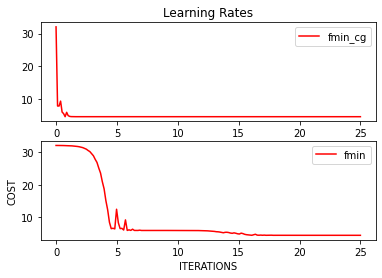

In [4]:
# plot learning rates of fmin and fmin_cg
xx = linspace(0,25,len(lr1))
xy = linspace(0,25,len(lr2))
plt.subplot(2,1,1)

plt.title("Learning Rates")
 
plt.plot( xx,lr1,'r',label='fmin_cg') # (lr1) learning rate 1 of fmin
plt.legend()
plt.subplot(2,1,2)
plt.plot( xy,lr2,'r',label='fmin')  # (lr2)  learning rate 1 of fmin_cg
plt.ylabel('COST'); # Set the y  axis label
plt.xlabel('ITERATIONS'); # Set the x  axis label 
plt.legend() 
show()

Fitting second Order Polynomial through dataset.

The cost is 32.072733877455676
[0.01543341 0.0874023  0.05184844]


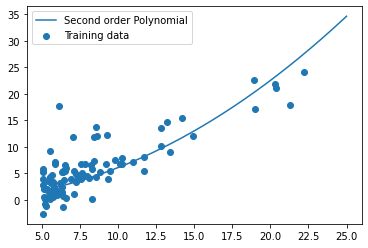

In [5]:
from numpy import *
import matplotlib.pyplot as plt

# used for manipulating directory paths
import os

def plotdata(a,b):                       # function def
  # plotting points as a scatter plot 
 ########### YOUR CODE HERE ###########
 #copy the code of plotdata function from ex2P1 and paste here 
  plt.scatter(a, b)
  ######################################
  return

def computeCostVectorize(X,y , theta):
  m = y.size
  J = 0    # You need to return this parameter correctly
  h = np.dot(X, theta)
  ############ YOUR Vectorize COST FUNCTION J HERE ###########
  # Use vectorize implemntation. (without using loop)
  J=np.sum(np.square(h-y))/(2*m)


 ############################################################
  return J

## ======================= Vectorize Gradient Descent =======================

def gradientDescentVectorize(X, y, theta, alpha, num_iters):
  m = y.shape[0]
  theta = theta.copy()
  J_history = []
 
  for i in range(num_iters):
    ########### YOUR Vectorize GRADIENT DESCENT "theta" HERE ###########
    #vactorize implementation (without looping through training data)
    theta = theta - alpha*(1/m)*np.transpose(X)@(X@theta - y)



    ######################################################
    J_history.append(computeCostVectorize(X, y, theta))  
  return theta, J_history

X, Y = data[:, 0], data[:, 1]
m=len(data)
X=np.stack([np.ones(m),X, np.power(X,2)],axis=1)

cost= computeCostVectorize(X, Y, theta=np.array([0.0, 0.0,0.0]))
print("The cost is",cost )

theta_2 = np.zeros(3)

# some gradient descent settings
iterations = 1500
alpha = 0.00001

theta_2, J_history = gradientDescentVectorize(X ,Y, theta_2, alpha, iterations) 
print(theta_2)
# plot the 2nd Order fit
plotdata(X[:, 1],Y)
p = np.linspace(5, 25, 1000)
p=np.stack([np.ones(1000),p, np.power(p,2)],axis=1)

plt.plot(p[:, 1], np.dot(p, theta_2))  
plt.legend([ 'Second order Polynomial','Training data',]);

Fitting third Order Polynomial through same dataset.

The cost is 32.072733877455676
[4.39699139e-05 3.13552441e-04 1.95039396e-03 2.74156825e-03]


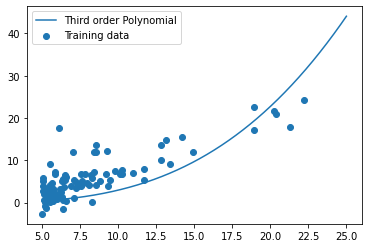

In [6]:
X, Y = data[:, 0], data[:, 1]
m=len(data)

X=np.stack([np.ones(m),X, np.power(X,2),np.power(X,3)],axis=1)

cost= computeCostVectorize(X, Y, theta=np.array([0.0, 0.0,0.0,0.0]))
print("The cost is",cost )

theta_3 = np.zeros(4)

# some gradient descent settings
iterations = 1500
alpha = 0.00000001

theta_3, J_history = gradientDescentVectorize(X ,Y, theta_3, alpha, iterations) 
print(theta_3)
# plot the 3rd order polynomial fit
plotdata(X[:, 1],Y)

p = np.linspace(5, 25, 1000)
p=np.stack([np.ones(1000),p, np.power(p,2),np.power(p,3)],axis=1)

plt.plot(p[:, 1], np.dot(p, theta_3)) 

plt.legend([ 'Third order Polynomial','Training data',]);